In [9]:
from RNG import Generator
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

In [3]:
randomic = Generator(13,10)
tec=[]

for i in randomic[2:]: 
    tec.append(-20*math.log(i))
        
print(tec)


[6.850052775916015, 3.899160712190344, 0.7654276061460402, 1.53818058443831, 3.3336240121390492, 9.834189778673633, 3.84158854383182, 3.7060412608398257, 37.80849599074521, 0.29157496056015325]


<BarContainer object of 38 artists>

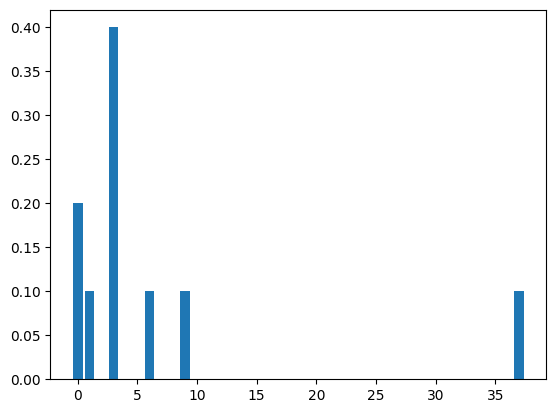

In [4]:
# Contar as ocorrências de cada valor no vetor
ocorrencias = np.bincount(tec)

# Calcular a proporção em relação ao total
total = len(tec)
proporcoes = ocorrencias / total

# Criar um gráfico de barras
plt.bar(range(len(proporcoes)), proporcoes)

In [7]:
randomic = Generator(11,10)
ts=[]
for i in randomic[2:]: 
    ts.append(-5*math.log(i)+20)
        
print(ts)

[24.026926804180704, 25.829235501334203, 35.48866429408719, 20.751559220692336, 24.475692020234575, 23.293817867984238, 23.8016525346849, 23.751123073306438, 26.33595023192455, 27.60432341162607]


<BarContainer object of 36 artists>

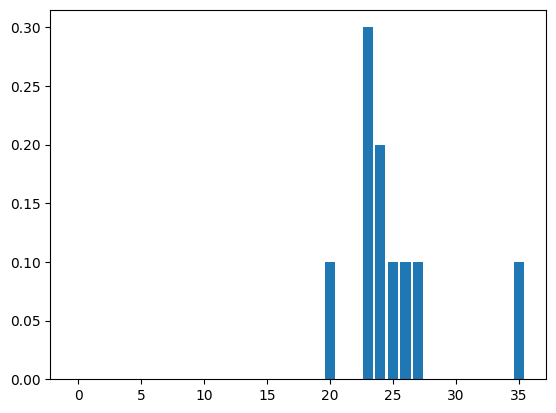

In [8]:
# Contar as ocorrências de cada valor no vetor
ocorrencias = np.bincount(ts)

# Calcular a proporção em relação ao total
total = len(ts)
proporcoes = ocorrencias / total

# Criar um gráfico de barras
plt.bar(range(len(proporcoes)), proporcoes)

In [57]:
def generateDataClients(quant_client,simulation_time = 480,seed_1 = 13,seed_2 = 11,quant_func = 1):
    randomic_numbers_1 = Generator(seed_1,quant_client+2)
    randomic_numbers_2 = Generator(seed_2,quant_client+2)
    
    tec=[]
    ts=[]
    for i in randomic_numbers_1[2:]: 
        tec.append(-20*math.log(i))
    
    for i in randomic_numbers_2[2:]: 
        ts.append((-5*math.log(i)+20)/quant_func)
    
    arrive_absolute_time = [tec[0]]
    initial_service_time = [tec[0]]
    finish_service_time = [tec[0] + ts[0]]
    queue_time = [0]
    system_time = [queue_time[0] + ts[0]]
    idle_func = [tec[0]]
    
    for i in range(1,quant_client):
        arrive_absolute_time.append(arrive_absolute_time[i-1]+tec[i])
        initial_service_time.append(max(finish_service_time[i-1],arrive_absolute_time[i]))
        finish_service_time.append(ts[i]+ initial_service_time[i])
        queue_time.append(max(finish_service_time[i-1] - arrive_absolute_time[i],0))
        system_time.append(queue_time[i]+ts[i])
        idle_func.append(max(arrive_absolute_time[i] - finish_service_time[i-1],0))
        if(finish_service_time[i] > simulation_time):
            #print(i)
            break
    
    served_clients = len(arrive_absolute_time)
    
    return {
        'Cliente': range(served_clients),
        'TEC': tec[:served_clients],
        'TS': ts[:served_clients],
        'Tempo de chegada no relógio': arrive_absolute_time,
        'Tempo inicio serviço': initial_service_time,
        'Tempo fim serviço': finish_service_time,
        'Tempo na fila': queue_time,
        'Tempo no sistema': system_time,
        'Tempo ocioso': idle_func
    }
    
    

In [58]:
client_table = pd.DataFrame(generateDataClients(200,240))
client_table

,Cliente,TEC,TS,Tempo de chegada no relógio,Tempo inicio serviço,Tempo fim serviço,Tempo na fila,Tempo no sistema,Tempo ocioso
0,0,6.850053,24.026927,6.850053,6.850053,30.876980,0.000000,24.026927,6.850053
1,1,3.899161,25.829236,10.749213,30.876980,56.706215,20.127766,45.957002,0.000000
2,2,0.765428,35.488664,11.514641,56.706215,92.194879,45.191574,80.680238,0.000000
3,3,1.538181,20.751559,13.052822,92.194879,112.946439,79.142058,99.893617,0.000000
4,4,3.333624,24.475692,16.386446,112.946439,137.422131,96.559993,121.035685,0.000000
5,5,9.834190,23.293818,26.220635,137.422131,160.715948,111.201495,134.495313,0.000000
6,6,3.841589,23.801653,30.062224,160.715948,184.517601,130.653724,154.455377,0.000000
7,7,3.706041,23.751123,33.768265,184.517601,208.268724,150.749336,174.500459,0.000000
8,8,37.808496,26.335950,71.576761,208.268724,234.604674,136.691963,163.027913,0.000000
9,9,0.291575,27.604323,71.868336,234.604674,262.208998,162.736338,190.340662,0.000000


In [60]:

avg_queue_time = [client_table['Tempo na fila'].mean()]
avg_service_time = [client_table['TS'].mean()]
avg_system_time = [client_table['Tempo no sistema'].mean()]
avg_idle_time = [client_table['Tempo ocioso'].mean()]

metrics =  pd.DataFrame({
        'Tempo médio de espera na fila':avg_queue_time,
        'Tempo médio de serviço':avg_service_time,
        'Tempo médio despendido no sistema':avg_system_time,
        'Tempo médio ocioso do funcionário':avg_idle_time,
    }
)

metrics.head()

,Tempo médio de espera na fila,Tempo médio de serviço,Tempo médio despendido no sistema,Tempo médio ocioso do funcionário
0,93.305425,25.535894,118.841319,0.685005


In [87]:
REPLICATIONS = 130
vet_1 = Generator(13,REPLICATIONS+2)
vet_2 = Generator(11,REPLICATIONS+2)
seeds_1 = [int((x + 0.004) *300) for x in vet_1]
seeds_2 = [int((x + 0.004) *250) for x in vet_2]

for i in range(1,REPLICATIONS+2):
    #print(seeds_1[i+2])
    client_table = pd.DataFrame(generateDataClients(200,240,seeds_1[i+2],seeds_2[i+2]))
    avg_queue_time.append(client_table['Tempo na fila'].mean())
    avg_service_time.append(client_table['TS'].mean())
    avg_system_time.append(client_table['Tempo no sistema'].mean())
    avg_idle_time.append(client_table['Tempo ocioso'].mean())
    
metrics =  pd.DataFrame({
        'Tempo médio de espera na fila':avg_queue_time,
        'Tempo médio de serviço':avg_service_time,
        'Tempo médio despendido no sistema':avg_system_time,
        'Tempo médio ocioso do funcionário':avg_idle_time,
    }
)

metrics.head(10)


,Tempo médio de espera na fila,Tempo médio de serviço,Tempo médio despendido no sistema,Tempo médio ocioso do funcionário
0,93.305425,25.535894,118.841319,0.685005
1,23.551716,52.619012,76.170727,112.215236
2,20.698794,27.300399,47.999193,5.927409
3,17.942808,30.760637,48.703444,13.144595
4,14.282751,27.118738,41.401489,8.627136
5,11.195506,27.268749,38.464256,13.884400
6,43.732595,30.238364,73.970958,6.271835
7,26.400358,29.039640,55.439998,12.561013
8,9.680684,25.687432,35.368116,6.114471
9,36.227221,28.149729,64.376950,6.325038


In [91]:

avg_of_avg_queue_time = [metrics['Tempo médio de espera na fila'].mean()]
avg_of_avg_service_time = [metrics['Tempo médio de serviço'].mean()]
avg_of_avg_system_time = [metrics['Tempo médio despendido no sistema'].mean()]
avg_of_avg_idle_time = [metrics['Tempo médio ocioso do funcionário'].mean()]

standard_deviation_queue_time = np.std(metrics['Tempo médio de espera na fila'])
standard_deviation_service_time = np.std(metrics['Tempo médio de serviço'])
standard_deviation_system_time = np.std(metrics['Tempo médio despendido no sistema'])
standard_deviation_idle_time = np.std(metrics['Tempo médio ocioso do funcionário'])

t = 1.96
confidence_interval_queue_time_begin = avg_of_avg_queue_time - t * standard_deviation_queue_time/(REPLICATIONS**(1/2))
confidence_interval_queue_time_end = avg_of_avg_queue_time + t * standard_deviation_queue_time/(REPLICATIONS**(1/2))

confidence_interval_service_time_begin = avg_of_avg_service_time - t * standard_deviation_service_time/(REPLICATIONS**(1/2))
confidence_interval_service_time_end = avg_of_avg_service_time + t * standard_deviation_service_time/(REPLICATIONS**(1/2))

confidence_interval_system_time_begin = avg_of_avg_system_time - t * standard_deviation_system_time/(REPLICATIONS**(1/2))
confidence_interval_system_time_end = avg_of_avg_system_time + t * standard_deviation_system_time/(REPLICATIONS**(1/2))

confidence_interval_idle_time_begin = avg_of_avg_idle_time - t * standard_deviation_idle_time/(REPLICATIONS**(1/2))
confidence_interval_idle_time_end = avg_of_avg_idle_time + t * standard_deviation_idle_time/(REPLICATIONS**(1/2))



final_metrics = pd.DataFrame(
    index = [
        'Tempo de Espera',
        'Tempo de serviço',
        'Tempo no sistema',
        'Tempo ocioso'
    ],
    columns = [
        'Média das médias',
        'Desvio Padrão',
        'Início do intervalo de confiaça',
        'Final do intervalo de confiaça'
    ],
    data = [
        [f'{avg_of_avg_queue_time:.2f}', f'{standard_deviation_queue_time:.2f}',f'{confidence_interval_queue_time_begin:.2f}',f'{confidence_interval_queue_time_end:.2f}'],
        [f'{avg_of_avg_service_time:.2f}', f'{standard_deviation_service_time:.2f}',f'{confidence_interval_service_time_begin:.2f}',f'{confidence_interval_service_time_end:.2f}'],
        [f'{avg_of_avg_system_time:.2f}', f'{standard_deviation_system_time:.2f}',f'{confidence_interval_system_time_begin:.2f}',f'{confidence_interval_system_time_end:.2f}'],
        [f'{avg_of_avg_idle_time:.2f}',f'{standard_deviation_idle_time:.2f}',f'{confidence_interval_idle_time_begin:.2f}',f'{confidence_interval_idle_time_end:.2f}'],
        ]
)

final_metrics.head()

TypeError: unsupported format string passed to list.__format__